![lop](../../images/logo_diive1_128px.png)

<span style='font-size:32px; display:block;'>
<b>
    Diel cycle
</b>
</span>

---
**Notebook version**: `1` (14 May 2024)  
**Author**: Lukas Hörtnagl (holukas@ethz.ch)  

</br>

# **Description**

- `DielCycle` is a class for plotting diel cycles of time series data.
- Uses the time info from the timestamp (datetime) index to aggregate. Aggregation is done on unique times found in the index.
- For example, if the time part of the datetime index is hourly (e.g. 0:00, 01:00, 02:00 etc.), then hourly averages are calculated.

</br>

# **Imports**

In [1]:
import importlib.metadata
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
from datetime import datetime
import diive.configs.exampledata as ed
from diive.core.plotting.dielcycle import DielCycle
import warnings
warnings.filterwarnings('ignore')
version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.76.0


</br>

# **Docstring**

In [2]:
help(DielCycle)

Help on class DielCycle in module diive.core.plotting.dielcycle:

class DielCycle(builtins.object)
 |  DielCycle(series: pandas.core.series.Series)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, series: pandas.core.series.Series)
 |      Plot diel cycles of time series.
 |      
 |      Args:
 |          series: Time series with datetime index.
 |              The index must contain date and time info.
 |  
 |  get_data(self) -> pandas.core.frame.DataFrame
 |  
 |  plot(self, ax: matplotlib.axes._axes.Axes = None, title: str = None, color: str = None, txt_ylabel_units: str = None, mean: bool = True, std: bool = True, each_month: bool = False, legend_n_col: int = 1, **kwargs)
 |  
 |  ----------------------------------------------------------------------
 |  Readonly properties defined here:
 |  
 |  diel_cycles_df
 |      Return dataframe containing diel cycle aggregates.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors define

</br>

# **Load example data**

- Load CO2 and latent evaporation as example data

In [3]:
df = ed.load_exampledata_parquet()
co2 = df['NEE_CUT_REF_f'].copy()
le = df['LE_f'].copy()
display(co2)
display(le)

Loaded .parquet file L:\Sync\luhk_work\20 - CODING\21 - DIIVE\diive\diive\configs\exampledata\exampledata_PARQUET_CH-DAV_FP2022.5_2013-2022_ID20230206154316_30MIN.parquet (0.045 seconds). Detected time resolution of <30 * Minutes> / 30min 


TIMESTAMP_MIDDLE
2013-01-01 00:15:00    1.595
2013-01-01 00:45:00    1.595
2013-01-01 01:15:00    1.595
2013-01-01 01:45:00    0.538
2013-01-01 02:15:00    1.765
                       ...  
2022-12-31 21:45:00    1.224
2022-12-31 22:15:00    3.518
2022-12-31 22:45:00    2.424
2022-12-31 23:15:00    1.017
2022-12-31 23:45:00    2.281
Freq: 30min, Name: NEE_CUT_REF_f, Length: 175296, dtype: float64

TIMESTAMP_MIDDLE
2013-01-01 00:15:00    13.093
2013-01-01 00:45:00    13.093
2013-01-01 01:15:00    13.066
2013-01-01 01:45:00    13.066
2013-01-01 02:15:00    16.995
                        ...  
2022-12-31 21:45:00    -0.735
2022-12-31 22:15:00     4.724
2022-12-31 22:45:00     9.840
2022-12-31 23:15:00     2.653
2022-12-31 23:45:00    14.700
Freq: 30min, Name: LE_f, Length: 175296, dtype: float64

</br>

# **Plot diel cycle**

## Plot monthly diel cycles without specifying axis

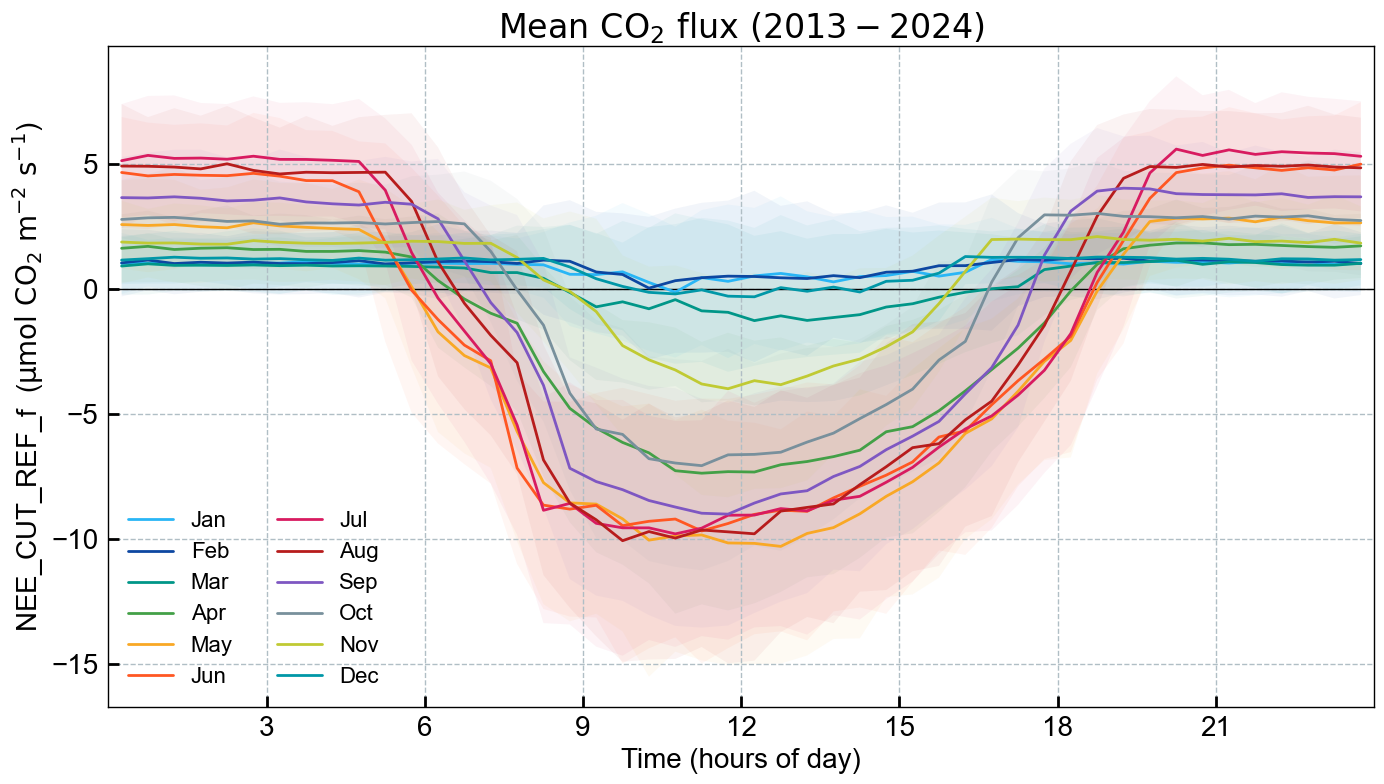

In [4]:
dc = DielCycle(series=co2)
title = r'$\mathrm{Mean\ CO_2\ flux\ (2013-2024)}$'
units = r'($\mathrm{µmol\ CO_2\ m^{-2}\ s^{-1}}$)'
dc.plot(title=title, txt_ylabel_units=units, each_month=True, legend_n_col=2);

## Plot diel cycle across all data (all months) without specifying axis

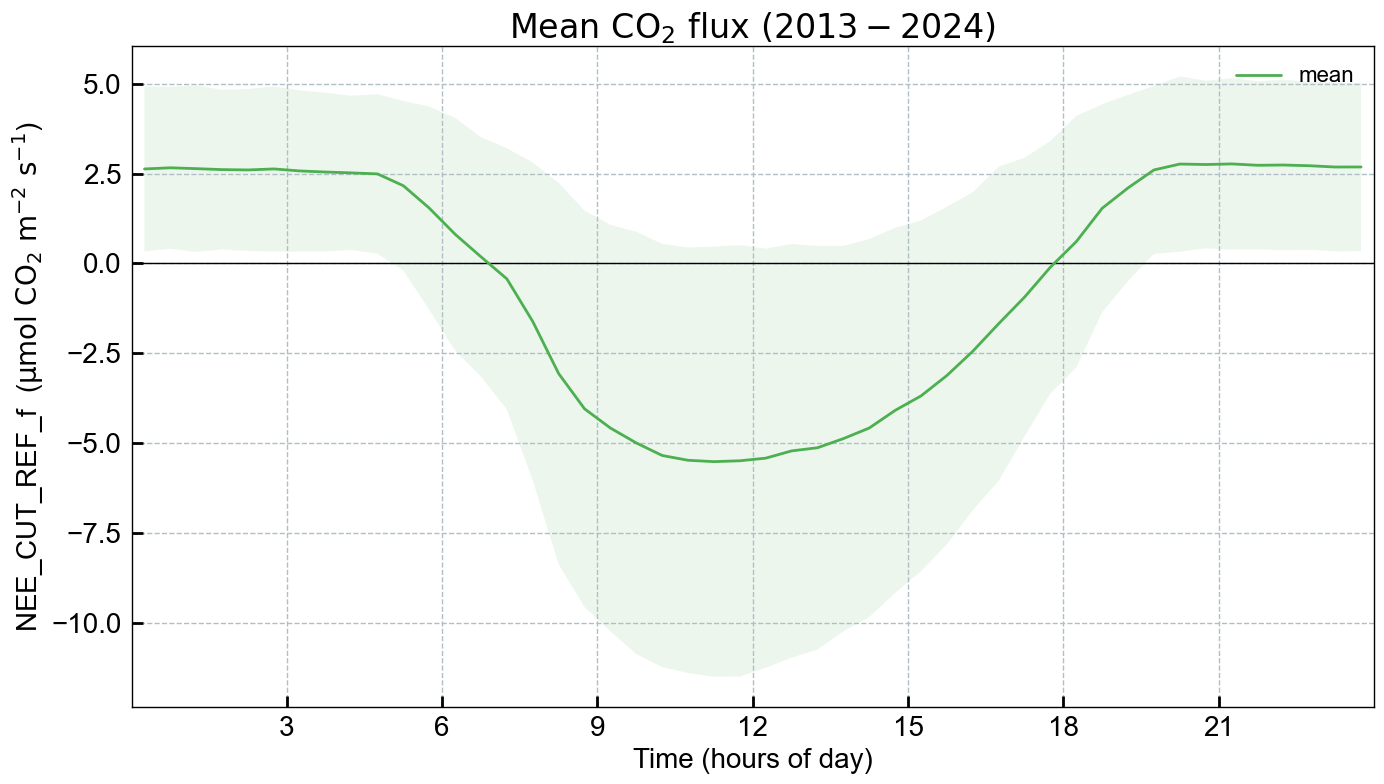

In [5]:
dc = DielCycle(series=co2)
title = r'$\mathrm{Mean\ CO_2\ flux\ (2013-2024)}$'
units = r'($\mathrm{µmol\ CO_2\ m^{-2}\ s^{-1}}$)'
dc.plot(title=title, color="#4CAF50", txt_ylabel_units=units, each_month=False);

## Plot into existing axis

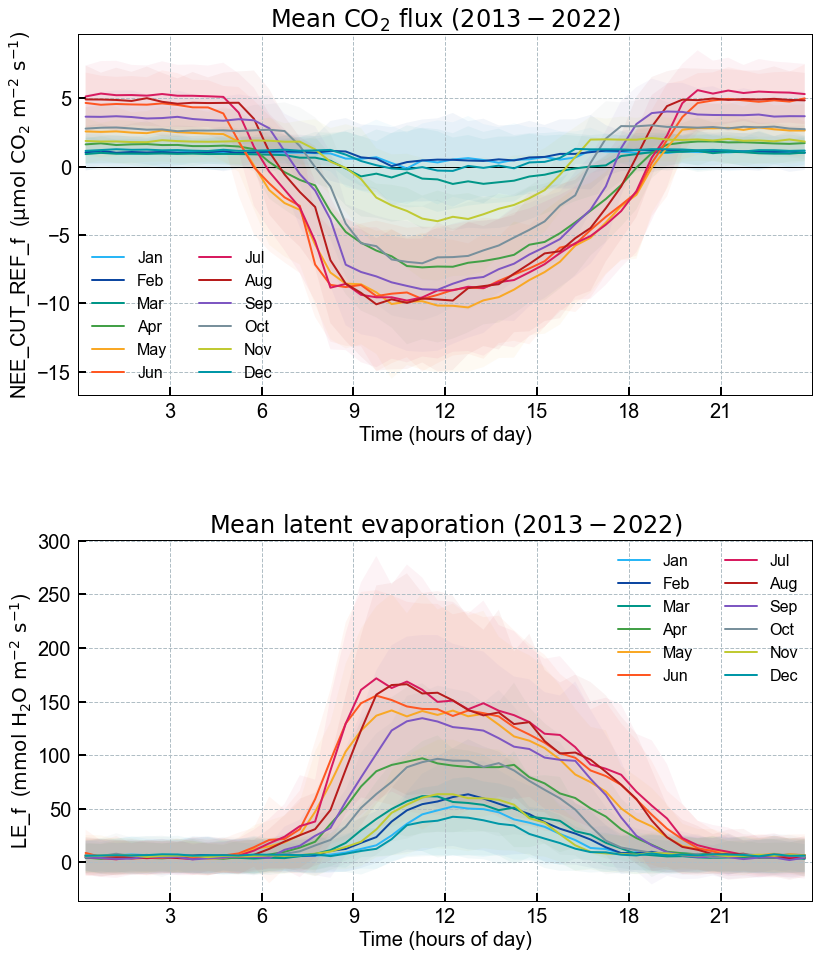

In [6]:
fig = plt.figure(facecolor='white', figsize=(12, 14), dpi=72)
gs = gridspec.GridSpec(2, 1)  # rows, cols
gs.update(wspace=0.3, hspace=0.4, left=0.08, right=0.93, top=0.93, bottom=0.07)
ax = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])

# CO2
dc_co2 = DielCycle(series=co2)
title = r'$\mathrm{Mean\ CO_{2}\ flux\ (2013-2022)}$'
units = r'($\mathrm{µmol\ CO_2\ m^{-2}\ s^{-1}}$)'
dc_co2.plot(ax=ax, title=title, txt_ylabel_units=units, each_month=True, legend_n_col=2)

# Latent evaporation
dc_le = DielCycle(series=le)
title = r'$\mathrm{Mean\ latent\ evaporation\ (2013-2022)}$'
units = r'($\mathrm{mmol\ H_2O\ m^{-2}\ s^{-1}}$)'
dc_le.plot(ax=ax2, title=title, txt_ylabel_units=units, each_month=True, legend_n_col=2)
fig.show()

# End of notebook

In [7]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished {dt_string}")

Finished 2024-05-14 23:25:31
